In [16]:
%load_ext autoreload
%autoreload 2
from som import MiniSom as SOM
import matplotlib.pyplot as plt
import numpy as np
import sys

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [54]:
data = [[ 1],
        [ 2],
        [ 3],
        [ 14],
        [ 1114],
        [ 3],
        [ 33],
        [ 0.77],
        [ 0.07],
        [-1],
        [-1000000]]     

In [57]:
som = SOM(5, 1, 1, sigma=0.03, learning_rate=0.3) # initialization of 6x6 SOM
print("Training...")
# som.random_weights_init(data)
som.train_random(data, 100000) # trains the SOM with 100 iterations
print("...ready!")

Training...
error: 0.7106774325894318, error std: 306.2683130487572, iteration:0
error: 0.0, error std: 104.97114245886118, iteration:1000
error: 0.1895236926218261, error std: 0.17005744010832277, iteration:2000
error: 0.0, error std: 0.27880464945083244, iteration:3000
error: 0.15967577436222524, error std: 0.2488208250346134, iteration:4000
error: 0.3010484565190601, error std: 0.2311937203704341, iteration:5000
error: 0.17931902964441854, error std: 0.28147885809462475, iteration:6000
error: 0.0, error std: 0.1712369232516755, iteration:7000
error: 0.39146870558045355, error std: 0.14743012081594364, iteration:8000
error: 0.045335853150570427, error std: 0.10921032540852131, iteration:9000
error: 0.0, error std: 0.14950788669599566, iteration:10000
error: 0.6411467624847241, error std: 0.1977249233128903, iteration:11000
error: 0.3081644608523586, error std: 0.1526836824746365, iteration:12000
error: 0.21631149091608992, error std: 0.27249289270220806, iteration:13000
error: 0.1191

In [ ]:
#  old result
# defaultdict(list,
#             {(0, 0): [[1], [2], [3], [3], [0.77], [0.07], [-1]],
#              (4, 0): [[14]],
#              (1, 0): [[1114]],
#              (2, 0): [[33]],
#              (3, 0): [[-1000000]]})


In [58]:
som.win_map(data)

defaultdict(list,
            {(0, 0): [[1], [2], [3], [3], [0.77], [0.07], [-1]],
             (4, 0): [[14]],
             (1, 0): [[1114]],
             (3, 0): [[33]],
             (2, 0): [[-1000000]]})

In [ ]:
# old result
# array([ 3.29999539e+01,  1.11399997e+03, -9.99999975e+05,  1.39999989e+01,
#         1.27196280e+00])

In [59]:
som.get_weights().reshape(5)

array([ 1.09200624e+00,  1.11400000e+03, -1.00000000e+06,  3.30000000e+01,
        1.40000000e+01])

In [42]:
ddatanp.random.multinomial(20, [1/6.]*6, size=1)(5, 2, (100000000,1))

In [43]:
ddata

array([[ 4.74187799],
       [16.25532149],
       [ 7.12713424],
       ...,
       [ 9.08908474],
       [11.79124236],
       [10.08381136]])

In [61]:
%%time
som = SOM(100, 1, 1, sigma=0.03, learning_rate=0.3) # initialization of 6x6 SOM
print("Training...")
# som.random_weights_init(data)
som.train_random(ddata, 10000) # trains the SOM with 100 iterations
print("...ready!")

Training...
diff: 1.7849732290849942, diff std: 280.226078863, iteration:0
diff: 0.08828504148345395, diff std: 0.7045259815935285, iteration:1000
diff: 0.09395380834160605, diff std: 0.0901986877869792, iteration:2000
...ready!
CPU times: user 1.43 s, sys: 31.4 ms, total: 1.46 s
Wall time: 1.45 s


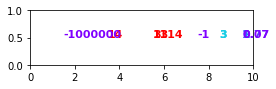

In [8]:
plt.figure(figsize=(4, 1))
wmap = {}
im = 0
for x in data:  # scatterplot
    w = som.winner(x)
    wmap[w] = im
    plt. text(w[0]+.5,  w[1]+.5,  str(x[0]),
              color=plt.cm.rainbow(x[0] / 10.), fontdict={'weight': 'bold',  'size': 11})
    im = im + 1
plt.axis([0, som.get_weights().shape[0], 0,  som.get_weights().shape[1]])
# plt.savefig('resulting_images/som_digts.png')
plt.show()

In [7]:
som = SOM(5, 1, 1, sigma=0.03, learning_rate=0.3) # initialization of 6x6 SOM

max_iter = 1000
q_error_pca_init = []
iter_x = []
for i in range(max_iter):
    percent = 100*(i+1)/max_iter
    rand_i = np.random.randint(len(data))
    som.update(data[rand_i], som.winner(data[rand_i]), i, max_iter)
    if (i+1) % 10 == 0:
        error = som.quantization_error(data)
        q_error_pca_init.append(error)
        iter_x.append(i)
        print(f'\riteration={i:2d} status={percent:0.2f}% error={error}')

iteration= 9 status=1.00% error=63979.57044386863
iteration=19 status=2.00% error=32100.649012805556
iteration=29 status=3.00% error=32076.119444130276
iteration=39 status=4.00% error=23049.571904260345
iteration=49 status=5.00% error=12171.118468650617
iteration=59 status=6.00% error=8871.300675090895
iteration=69 status=7.00% error=8869.89057702441
iteration=79 status=8.00% error=3576.0055833202405
iteration=89 status=9.00% error=2663.532576810169
iteration=99 status=10.00% error=1995.687786833487
iteration=109 status=11.00% error=1128.1719872905326
iteration=119 status=12.00% error=1127.3977571053124
iteration=129 status=13.00% error=652.00391036945
iteration=139 status=14.00% error=651.7666225864604
iteration=149 status=15.00% error=383.7071721060936
iteration=159 status=16.00% error=383.72319578896753
iteration=169 status=17.00% error=297.80126775700654
iteration=179 status=18.00% error=297.9560005085256
iteration=189 status=19.00% error=232.73867603669544
iteration=199 status=20.

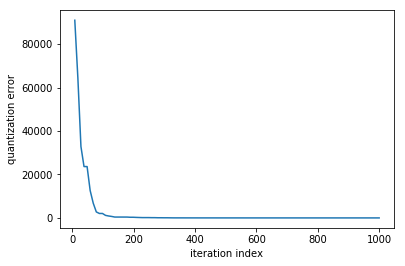

In [46]:
plt.plot(iter_x, q_error_pca_init)
plt.ylabel('quantization error')
plt.xlabel('iteration index')
plt.show()

In [8]:
som.win_map(data)

defaultdict(list,
            {(0, 0): [[1], [2], [3], [3], [0.77], [0.07], [-1]],
             (2, 0): [[14]],
             (1, 0): [[1114]],
             (3, 0): [[33]],
             (4, 0): [[-1000000]]})

In [9]:
som.activation_response(data)

array([[7.],
       [1.],
       [1.],
       [1.],
       [1.]])

In [10]:
som.get_weights()

array([[[ 1.22554968e+00]],

       [[ 1.11399999e+03]],

       [[ 1.39999860e+01]],

       [[ 3.29999953e+01]],

       [[-9.99999985e+05]]])